Extracting the Zip File

In [11]:
import zipfile
import os

zip_file_path = '/content/Resized-handwritten-signature-verification.zip'
extracted_folder = '/content/Resized-224x224-signature-verification/'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the target folder
    zip_ref.extractall(extracted_folder)

print("Extraction complete.")


Extraction complete.


Delete Any Files not belonging to a folder

In [13]:
import os

folder_path = '/content/Resized-224x224-signature-verification'
extensions_to_keep = ['.jpg', '.png', '.gif']  # Add the extensions you want to keep

# Delete files that are not inside a folder and do not have specified extensions
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)

    # Check if the file is a regular file (not a directory) in the root of the specified folder
    if os.path.isfile(file_path):
        # Check if the file has an extension and if it's not in the list of extensions to keep
        if '.' in file and not any(file.lower().endswith(ext) for ext in extensions_to_keep):
            os.remove(file_path)

print("Cleanup complete.")




Cleanup complete.


Renaming The folders

In [14]:
import os

folder_path = '/content/Resized-224x224-signature-verification'

# Get a list of all folders in the specified path
folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Sort the folders to ensure consistent numbering
folders.sort()

# Rename the folders with the desired format
for index, folder in enumerate(folders, start=1):
    new_name = f'Person-{str(index).zfill(4)}'
    old_path = os.path.join(folder_path, folder)
    new_path = os.path.join(folder_path, new_name)

    os.rename(old_path, new_path)

print("Folder renaming complete.")


Folder renaming complete.


Renaming the Images in Each Folder

In [15]:
import os

folder_path = '/content/Resized-224x224-signature-verification/'

# Get a list of all folders in the specified path
folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Sort the folders to ensure consistent numbering
folders.sort()

# Iterate through each folder and rename the files
for index, folder in enumerate(folders, start=1):
    folder_path = os.path.join('/content/Resized-224x224-signature-verification/', folder)
    files = os.listdir(folder_path)

    # Sort the files to ensure consistent numbering
    files.sort()

    # Rename each file in the folder
    for file_index, file_name in enumerate(files, start=1):
        base_name, file_extension = os.path.splitext(file_name)
        new_name = f'{str(file_index).zfill(3)}{file_extension}'
        old_path = os.path.join(folder_path, file_name)
        new_path = os.path.join(folder_path, new_name)

        os.rename(old_path, new_path)

print("File renaming complete.")



File renaming complete.


Delete Any Files not belonging to a folder

In [20]:
import os

folder_path = '/content/Resized-224x224-signature-verification'

# Delete files that are not inside a folder
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)

    # Check if the file is a regular file (not a directory) in the root of the specified folder
    if os.path.isfile(file_path) and not os.path.basename(file_path).startswith('.'):
        os.remove(file_path)

print("Cleanup complete.")


Cleanup complete.


Zip and download the cleaned data as a backup

In [21]:
import os
import shutil

source_folder = '/content/Resized-224x224-signature-verification'
zip_name = 'Clean-Data-Resized-224x224-signature-verification.zip'
destination_folder = '/content'

# Create a zip file containing the contents of the source folder
shutil.make_archive(os.path.join(destination_folder, zip_name), 'zip', source_folder)

print(f"Zipped data saved at: {os.path.join(destination_folder, zip_name)}")


Zipped data saved at: /content/Clean-Data-Resized-224x224-signature-verification.zip


Data Split (Train and Validation) + Visualization of Data +

In [16]:
import tensorflow as tf
import numpy as np

In [24]:
base_dir=r"/content/Resized-224x224-signature-verification"

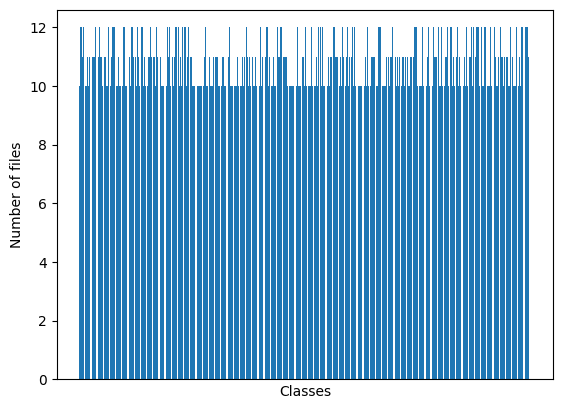

In [34]:
import os
import matplotlib.pyplot as plt

folder_path = '/content/Resized-224x224-signature-verification'

# Get a list of all subdirectories in the specified path
subdirs = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

# Sort the subdirectories to ensure consistent numbering
subdirs.sort()

# Count the number of files in each subdirectory
num_files = [len(os.listdir(os.path.join(folder_path, subdir))) for subdir in subdirs]

# Plot the number of files in each subdirectory without showing x-axis ticks
plt.bar(range(1, len(subdirs) + 1), num_files)
plt.xlabel('Classes')
plt.ylabel('Number of files')
plt.xticks([])  # Removes x-axis ticks
plt.show()
